In [2]:
# ============================================================
# SMART HOME RESOURCE MANAGEMENT — NO TENSORFLOW VERSION
# ============================================================

# ---------------------- 1. IMPORTS --------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import mean_squared_error

plt.rcParams["figure.figsize"] = (11, 4)
sns.set(style="whitegrid")

np.random.seed(42)

# ------------------ 2. GENERATE SMART HOME DATA --------------
def generate_data(days=365*2):
    hours = days * 24
    t = np.arange(hours)
    idx = pd.date_range("2024-01-01", periods=hours, freq="H")

    # Energy patterns
    daily = 0.4 + 0.4 * (np.sin(2*np.pi*(t%24)/24)+1)/2
    weekly = 0.2 * (np.sin(2*np.pi*(t%(24*7))/(24*7))+1)/2
    energy = 0.8 + daily + weekly + 0.1*np.random.randn(hours)

    # Water flow
    water = 0.5 + 0.8*(np.sin(2*np.pi*(t%24-6)/24)+1)/2 + 0.2*np.random.randn(hours)
    water = np.clip(water, 0, None)

    # Inject leaks
    for p in [3000, 9000, 15000]:
        water[p:p+12] += 3.5

    # Fridge temp
    temp = 4 + 0.5*np.sin(2*np.pi*(t%(24*7))/(24*7)) + 0.3*np.random.randn(hours)
    humidity = 60 + 10*np.sin(2*np.pi*(t%(24*5))/(24*5)) + 5*np.random.randn(hours)

    # Occupancy
    occ = 1 + (t%24 >= 18)*(t%24 <= 23)*2 + np.random.randint(0,3,hours)
    occ = np.clip(occ, 0, 6)

    # Food waste
    waste = np.clip(0.05*occ + 0.02*energy + 0.05*np.random.randn(hours), 0, None)

    df = pd.DataFrame({
        "timestamp": idx,
        "energy_kwh": energy,
        "water_flow_lph": water,
        "fridge_temp_C":  temp,
        "fridge_humidity": humidity,
        "occupancy_count": occ,
        "food_waste_kg": waste
    }).set_index("timestamp")

    return df

df = generate_data()
df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_16108\1647559669.py:24: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx = pd.date_range("2024-01-01", periods=hours, freq="H")


,energy_kwh,water_flow_lph,fridge_temp_C,fridge_humidity,occupancy_count,food_waste_kg
timestamp,,,,,,
2024-01-01 00:00:00,1.549671,0.524070,3.885662,61.834907,1,0.050191
2024-01-01 01:00:00,1.541676,0.657721,4.225101,61.046167,1,0.025351
2024-01-01 02:00:00,1.672242,0.381873,3.644913,54.813016,2,0.064955
2024-01-01 03:00:00,1.804921,0.956260,3.711194,68.299626,1,0.034248
2024-01-01 04:00:00,1.664694,0.290567,3.984991,58.364612,1,0.122576


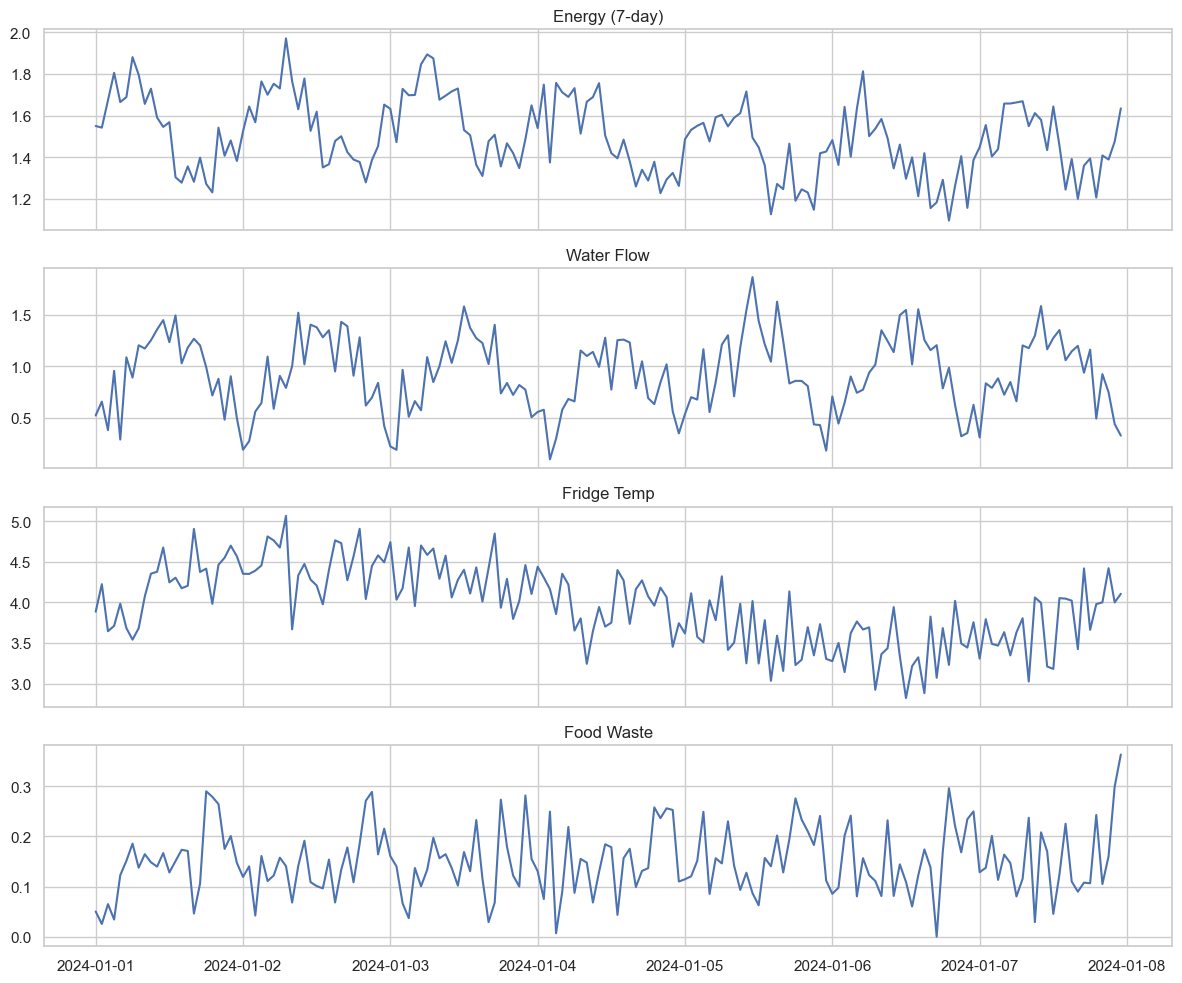

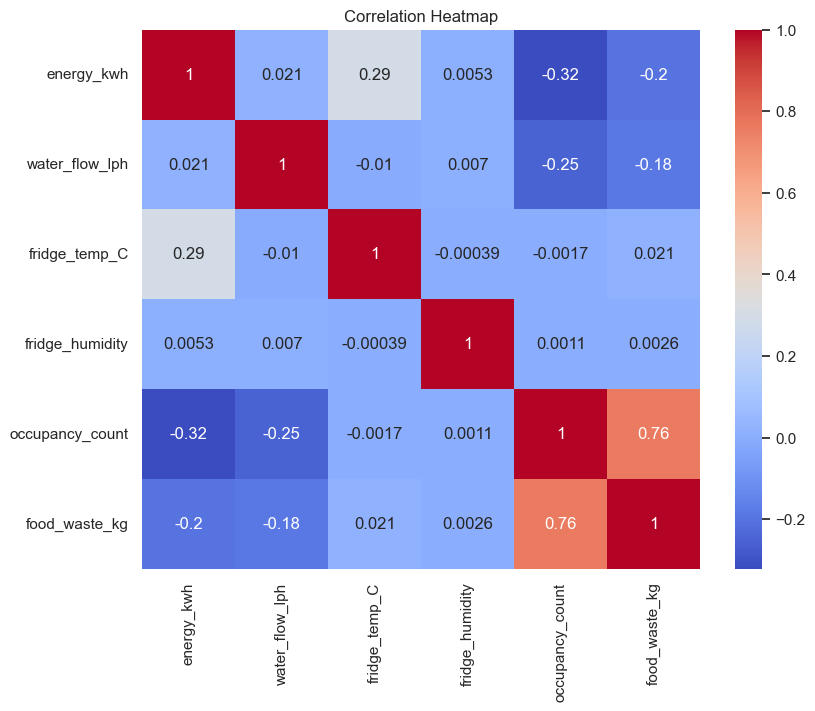

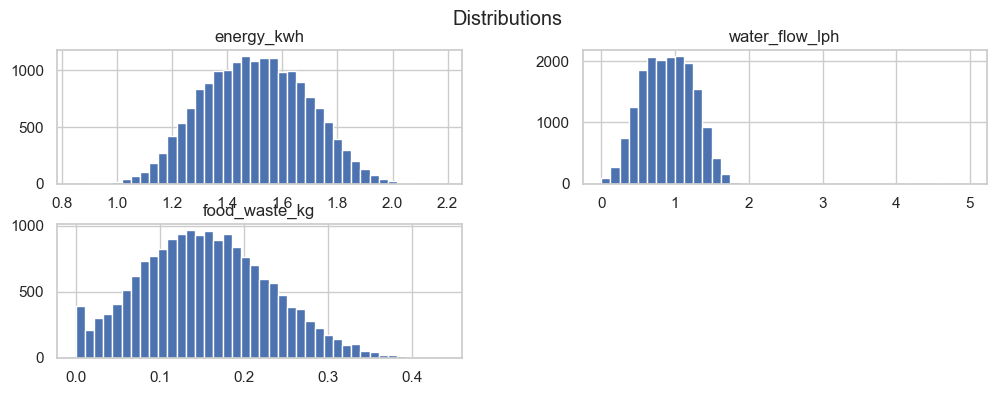

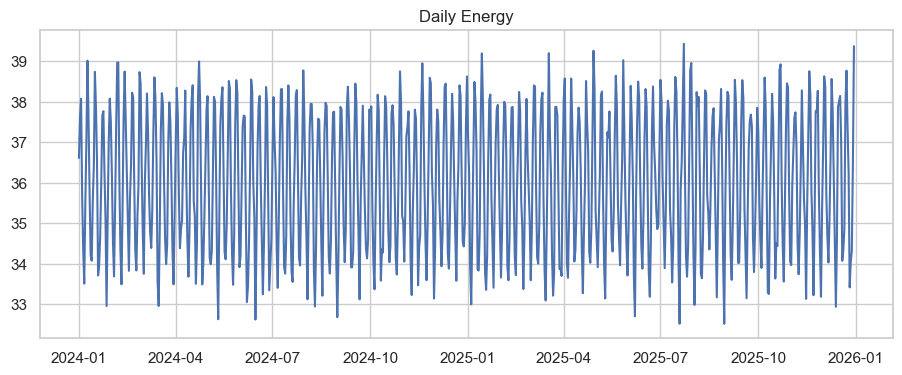

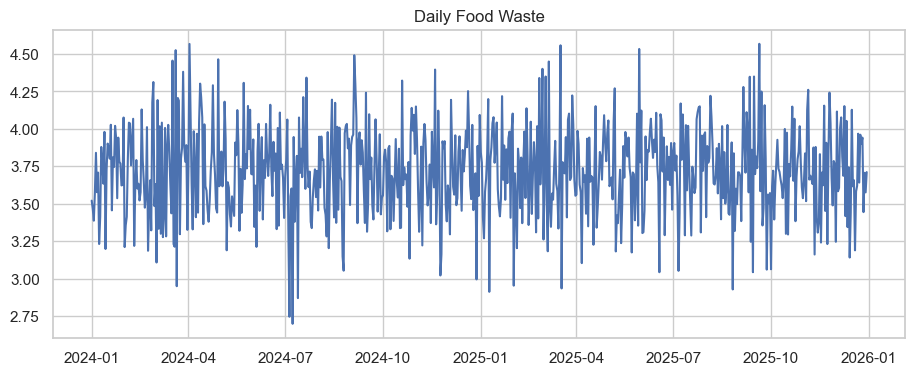

In [3]:
# ------------------ 3. EDA (GRAPHS) -------------------------

# 7-day sample plots
sample = df.iloc[:24*7]

fig, ax = plt.subplots(4,1,figsize=(12,10), sharex=True)
ax[0].plot(sample.energy_kwh); ax[0].set_title("Energy (7-day)")
ax[1].plot(sample.water_flow_lph); ax[1].set_title("Water Flow")
ax[2].plot(sample.fridge_temp_C); ax[2].set_title("Fridge Temp")
ax[3].plot(sample.food_waste_kg); ax[3].set_title("Food Waste")
plt.tight_layout(); plt.show()

# Correlation heatmap
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Histograms
df[["energy_kwh","water_flow_lph","food_waste_kg"]].hist(bins=40, figsize=(12,4))
plt.suptitle("Distributions")
plt.show()

# Daily energy & waste
daily = df.resample("D").sum()

plt.plot(daily.energy_kwh); plt.title("Daily Energy"); plt.show()
plt.plot(daily.food_waste_kg); plt.title("Daily Food Waste"); plt.show()


In [ ]:
# ------------------ 6. WASTE vs OCCUPANCY & ENERGY GRAPHS ------------------

sns.scatterplot(x=df.occupancy_count, y=df.food_waste_kg)
plt.title("Food Waste vs Occupancy")
plt.show()

sns.scatterplot(x=daily.energy_kwh, y=daily.food_waste_kg)
plt.title("Daily Energy vs Food Waste")
plt.show()

norm = (daily - daily.min())/(daily.max()-daily.min())

plt.plot(norm.energy_kwh, label="Energy")
plt.plot(norm.food_waste_kg, label="Food Waste")
plt.title("Energy vs Food Waste Trend")
plt.legend()
plt.show()

print("✔ All tasks completed WITHOUT tensorflow")
print("✔ Graphs generated")
print("✔ Models run fully")


Detected anomalies: 351


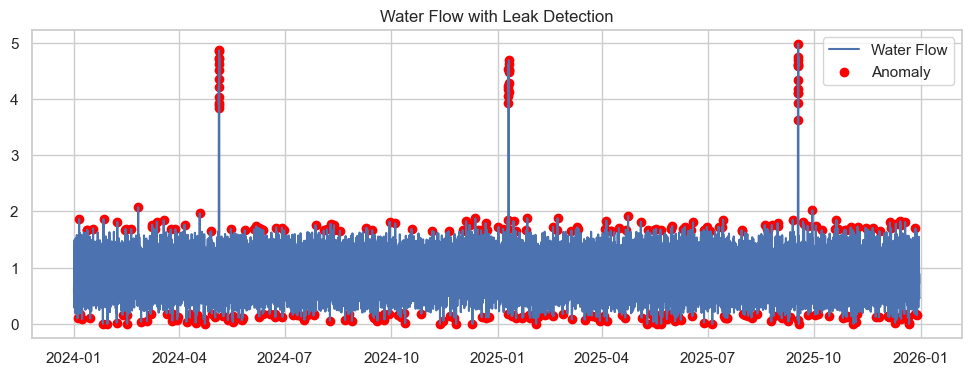

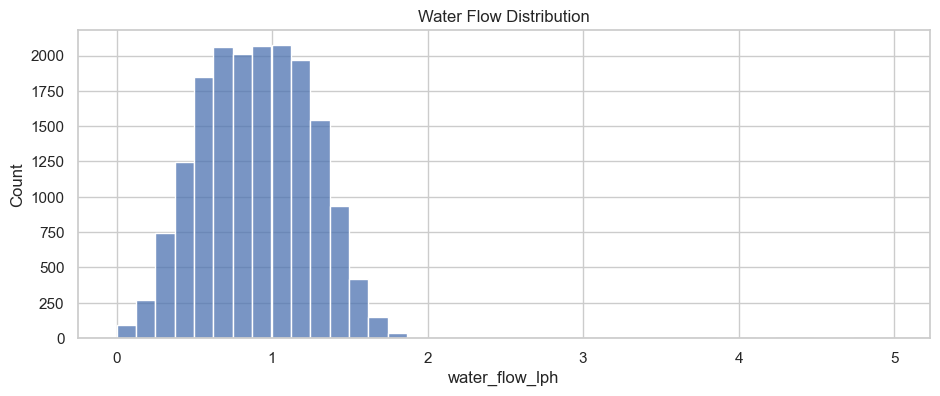